In [1]:
import tensorflow as tf


In [2]:
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
print(tf.__version__)

2.0.0


In [5]:
fashion_mnist=keras.datasets.fashion_mnist

In [6]:
print(type(fashion_mnist))

<class 'module'>


In [7]:
# loading data sets return 4 numpy arrays

In [8]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [9]:
#images are 28 X 28 numpy arrays with pixel value ranging from 0 to 255
#labels are array of integers ranging from 0 to 9
# labels reprsent class of cloathing an image represent

In [10]:
# since class name are not included with data sets we have to store them here

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
test_labels.shape

(10000,)

In [14]:
train_labels.shape

(60000,)

In [15]:
type(train_labels)

numpy.ndarray

In [16]:
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

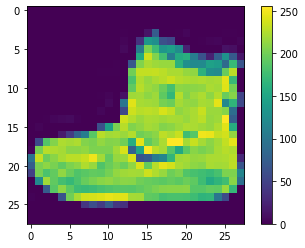

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images=train_images/255.0
test_images=test_images/255.0

In [19]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','shirt','Sneaker',"Bag","Ankle boot"]

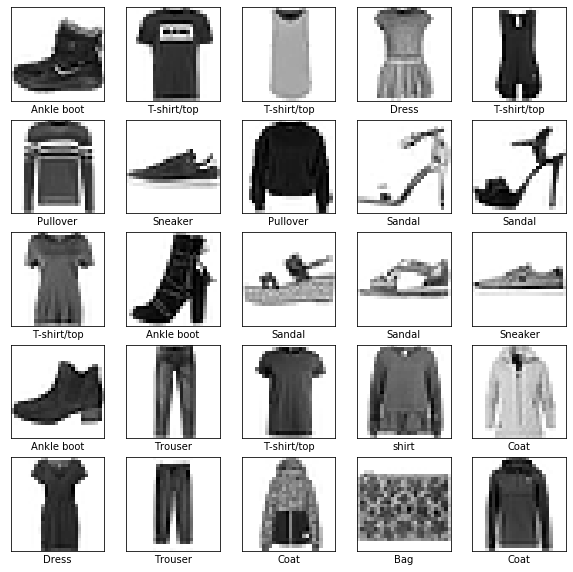

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [21]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
train_images=train_images.reshape(60000,-1) # convert 60000 to 28 X 28 to 6000 X 784 by merging last images
test_images=test_images.reshape(10000,-1) # convert 10000 to 28 X 28 to 10000 X 784 by merging last images

In [23]:
mtrain=50000
mtest=10000
m_v=10000

In [24]:
train_labels=train_labels.reshape((mtrain+mtest,1))
print(train_labels.shape)

(60000, 1)


In [25]:
test_images.shape

(10000, 784)

In [26]:
X=np.array(train_images)[:mtrain,:]
X_v=np.array(train_images)[mtrain:,:]
Y=np.array(train_labels)[:mtrain,:]
Y_v=np.array(train_labels)[mtrain:,:]
print(X.shape,X_v.shape,Y.shape,Y_v.shape)
X=X.T
X_v=X_v.T

(50000, 784) (10000, 784) (50000, 1) (10000, 1)


In [27]:
print(np.max(X),np.max(X_v),np.min(X),np.min(X_v))

1.0 1.0 0.0 0.0


In [28]:
#X=X/255.0
#X_v=X_v/255.0

In [29]:
n_para=784
theta1 = np.random.uniform(-0.12,0.12,(256,n_para))
b1=np.zeros([256,1])
#theta2=np.random.uniform(-0.12,0.12,(25,25))
theta2 = np.random.uniform(-0.12,0.12,(128,256))
b2=np.zeros([128,1])
theta3=np.random.uniform(-0.12,0.12,(64,128))
b3=np.zeros([64,1])
theta4=np.random.uniform(-0.12,0.12,(10,64))
b4=np.zeros([10,1])

print(X.shape)
print(X_v.shape)
print(theta1.shape,b1.shape,theta2.shape,b2.shape,theta3.shape,b3.shape,theta4.shape,b4.shape)


(784, 50000)
(784, 10000)
(256, 784) (256, 1) (128, 256) (128, 1) (64, 128) (64, 1) (10, 64) (10, 1)


In [30]:
def relu(z):
    z[z<=0]=0
    
    return z
def relu_grad(z):
    z[z>=0]=1
    z[z<0]=0
    return z
        
        
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  #sigmoid fn
def sigmoidgrad(z): #it compute derivate of sigmoid of the fn
    return sigmoid(z)*(1-sigmoid(z))
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0) 

print(sigmoidgrad(0))


0.25


In [31]:
def predictions(theta1,theta2,theta3,theta4,b1,b2,b3,b4,X):
        A0=X #784 X m
        print("input shape ",A0.shape)
        Z1=theta1@A0+b1        #256 X m
        A1=relu(Z1)            #256 X m
        Z2=theta2@A1+b2        # 128 X m
        A2=relu(Z2)            # 128 X m
        Z3=theta3@A2+b3        # 64 X m
        A3=relu(Z3)            # 64 X m
        #print("A2 shape ",A2.shape)
        Z4=theta4@A3+b4       #10 X m
        A4=softmax(Z4)         #10 X m
   
        output=np.argmax(A4, axis=0)   # 1 X m
        output=output.reshape((output.shape[0],1))
        #print("The predicted image ar ",output_rand)
        return output

In [32]:
def predictions_acc(theta1,theta2,theta3,theta4,b1,b2,b3,b4,X):
        A0=X #784 X m
        print("input shape ",A0.shape)
        Z1=theta1@A0+b1        #256 X m
        A1=relu(Z1)            #256 X m
        Z2=theta2@A1+b2        # 128 X m
        A2=relu(Z2)            # 128 X m
        Z3=theta3@A2+b3        # 64 X m
        A3=relu(Z3)            # 64 X m
        #print("A2 shape ",A2.shape)
        Z4=theta4@A3+b4       #10 X m
        A4=softmax(Z4)         #10 X m
   
        output=np.max(A4, axis=0)   # 1 X m
        output=output.reshape((output.shape[0],1))
        #print("The predicted image ar ",output_rand)
        return output

In [33]:
print("The predictions are")
output=predictions(theta1,theta2,theta3,theta4,b1,b2,b3,b4,X)
print(output)

The predictions are
input shape  (784, 50000)
[[5]
 [8]
 [8]
 ...
 [5]
 [9]
 [5]]


In [34]:
def accuracy(theta1,theta2,theta3,theta4,b1,b2,b3,b4,X,Y):
        A0=X
        Z1=theta1@A0+b1        #256 X m
        A1=relu(Z1)            #256 X m
        Z2=theta2@A1+b2        # 128 X m
        A2=relu(Z2)            # 128 X m
        Z3=theta3@A2+b3        # 64 X m
        A3=relu(Z3)            # 64 X m
        #print("A2 shape ",A2.shape)
        Z4=theta4@A3+b4       #10 X m
        A4=softmax(Z4)         #10 X m
   
        output=np.argmax(A4, axis=0)   # 1 X m
  
        output=output.reshape((Y.shape))
        #print("output shape",output.shape)
        #print(output)
        print(" accuracy  :", str(100 * np.mean(output == Y)) + "%")

    

In [35]:
print(" accuracy on training data  without training :")
accuracy(theta1,theta2,theta3,theta4,b1,b2,b3,b4,X,Y)

 accuracy on training data  without training :
 accuracy  : 7.416%


In [36]:
print(Y.shape)
print(output.shape)


(50000, 1)
(50000, 1)


In [37]:
y1=np.zeros([10,mtrain])
for u in range(0,mtrain):
    y1[Y[u],u]=1
print(y1)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [38]:
mval=m_v
y1_v=np.zeros([10,m_v])
for u in range(0,mval):
        y1_v[Y_v[u],u]=1

In [39]:
X.shape

(784, 50000)

In [40]:
def cost_reg(theta1,b1,theta2,b2,theta3,b3,theta4,b4,X,y1,m=mtrain):
    
    
    
    lambda1=1
    A0=X
    Z1=theta1@A0+b1        #256 X m
    A1=relu(Z1)            #256 X m
    Z2=theta2@A1+b2        # 128 X m
    A2=relu(Z2)            # 128 X m
    Z3=theta3@A2+b3        # 64 X m
    A3=relu(Z3)            # 64 X m
        #print("A2 shape ",A2.shape)
    Z4=theta4@A3+b4       #10 X m
    A4=softmax(Z4)         #10 X m
    
    
    A4[A4==0]=0.00001
    A4[A4==1]=0.99999
    
    J_cost1=np.sum((y1*np.log(A4))+((1-y1)*np.log(1-A4)) )
    J_cost2=np.sum(np.square(theta1))+np.sum(np.square(theta2))+np.sum(np.square(theta3))+np.sum(np.square(theta4))
    J_final=(J_cost1)/(-m)+(lambda1/(2*m))*J_cost2
    #print("regularised cost is ",J_final)
    return J_final

print("regularised cost is ",cost_reg(theta1,b1,theta2,b2,theta3,b3,theta4,b4,X,y1))

regularised cost is  3.2676408475436207


In [41]:
def compute_grad(theta1,b1,theta2,b2,theta3,b3,theta4,b4,X,y1,alpha,m=mtrain):
    
    
    #forward propagation
    A0=X
    Z1=theta1@A0+b1        #256 X m
    A1=relu(Z1)            #256 X m
    Z2=theta2@A1+b2        # 128 X m
    A2=relu(Z2)            # 128 X m
    Z3=theta3@A2+b3        # 64 X m
    A3=relu(Z3)            # 64 X m
        #print("A2 shape ",A2.shape)
    Z4=theta4@A3+b4       #10 X m
    A4=softmax(Z4)         #10 X m
    
    
    A4[A4==0]=0.000001
    A4[A4==1]=0.999999
      
     #backward propagation  
    
    delta4=A4-y1                        #10 X m
    Delta4=(delta4@(A3.T))/m            #a3=A1  #dw3      10 X 64             (10 X m ) X ( m X 64)
    db4=np.sum(delta4,axis=1)/m         # 10 X 1
    db4=db4.reshape((10,1))
    
    delta3=((theta4.T)@(delta4))*(relu_grad(A3))   # 64 Xm
    Delta3=(delta3@(A2.T))/m #a1=A1  #dw2            64 X 256     # (64 X m) X ( m X 256 ) 
    db3=np.sum(delta3,axis=1) /m                   # 64 X 1
    db3=db3.reshape((64,1))
    
    #delta2=((delta3)@(theta3))*(sigmoidgrad(A2))  # 10 Xm
    
    delta2=((theta3.T)@(delta3))*(relu_grad(A2))   # 128 Xm
    Delta2=(delta2@(A1.T))/m #a1=A1  #dw2            128 X 256     # (128 X m) X ( m X 256 ) 
    db2=np.sum(delta2,axis=1) /m                   # 128 X 1
    db2=db2.reshape((128,1))
    
    delta1=((theta2.T)@(delta2))*(relu_grad(A1))  # 256 X m    (256 X 64) X ( 64 X m )
    Delta1=(delta1@(A0.T))/m #a1=A1  #dw2           256 X 784   (256 X m) X (m X 784)
    db1=np.sum(delta1,axis=1) /m                  # 256 X 1
    db1=db1.reshape((256,1))
    
    theta4=theta4-(alpha)*Delta4                    # 10 X 64
    theta3=theta3-(alpha)*Delta3                    # 64 X 128
    theta2=theta2-(alpha)*Delta2                    #  128 X 256
    theta1=theta1-(alpha)*Delta1                    #  256 X 784
    b1=b1-(alpha)*db1
    b2=b2-(alpha)*db2
    b3=b3-(alpha)*db3
    b4=b4-(alpha)*db4
    return [theta1 ,theta2 ,theta3,theta4, b1, b2, b3,b4]
    
   

In [47]:
    
def train_model(theta1,b1,theta2,b2,theta3,b3,theta4,b4,X,Y,y1,mtrain,X_v,Y_v,y1_v,mval,it=2000,alpha=0.1):    
    #alpha=0.1 #initially i take large value of alpha ie lerning rate
    for i1 in range(0,it+1):#no of iteration
        [theta1 ,theta2 ,theta3,theta4, b1, b2, b3,b4]=compute_grad(theta1,b1,theta2,b2,theta3,b3,theta4,b4,X,y1,alpha,mtrain)
        if i1%200==0:
            print("Iteration ",i1,end=" ")
            print(" Trainingcost is <<<<<-",cost_reg(theta1,b1,theta2,b2,theta3,b3,theta4,b4,X,y1,mtrain))
            print("\t\tTraining  ",end=' ')
            accuracy(theta1,theta2,theta3,theta4,b1,b2,b3,b4,X,Y)
            print(" \t\tvalidation cost         ->>>>",cost_reg(theta1,b1,theta2,b2,theta3,b3,theta4,b4,X_v,y1_v,mval))
            print("\t\tVaidation  ",end=' ')
            accuracy(theta1,theta2,theta3,theta4,b1,b2,b3,b4,X_v,Y_v)
            #print(" accuracy on training data  without training :", str(100 * np.mean(output == Y)) + "%")
            
            print()
    return  [theta1 ,theta2 ,theta3,theta4, b1, b2, b3,b4]

In [43]:
#flag=int(input("Enter 1 if you want to train the model"))
flag=1

In [44]:
if flag:
    [theta1 ,theta2 ,theta3,theta4, b1, b2, b3,b4]=train_model(theta1,b1,theta2,b2,theta3,b3,theta4,b4,X,Y,y1,mtrain,X_v,Y_v,y1_v,mval)

Iteration  0  Trainingcost is <<<<<- 3.247449355817324
		Training    accuracy  : 11.831999999999999%
 		validation cost         ->>>> 3.2942130762099566
		Vaidation    accuracy  : 11.76%

Iteration  200  Trainingcost is <<<<<- 1.048872009924368
		Training    accuracy  : 77.85600000000001%
 		validation cost         ->>>> 1.1121891452215622
		Vaidation    accuracy  : 77.44%

Iteration  400  Trainingcost is <<<<<- 0.8722360979416652
		Training    accuracy  : 82.44%
 		validation cost         ->>>> 0.950213418548207
		Vaidation    accuracy  : 81.69%

Iteration  600  Trainingcost is <<<<<- 0.8087020294231949
		Training    accuracy  : 83.742%
 		validation cost         ->>>> 0.8894625783618648
		Vaidation    accuracy  : 82.91%

Iteration  800  Trainingcost is <<<<<- 0.7880457733183175
		Training    accuracy  : 84.1%
 		validation cost         ->>>> 0.8709145173790777
		Vaidation    accuracy  : 83.41%

Iteration  1000  Trainingcost is <<<<<- 0.765503841903361
		Training    accuracy  : 84.324

In [48]:
flag2=1

In [49]:
if flag2:
    [theta1 ,theta2 ,theta3,theta4, b1, b2, b3,b4]=train_model(theta1,b1,theta2,b2,theta3,b3,theta4,b4,X,Y,y1,mtrain,X_v,Y_v,y1_v,mval,it=500,alpha=0.03)

Iteration  0  Trainingcost is <<<<<- 0.6729035950745829
		Training    accuracy  : 86.714%
 		validation cost         ->>>> 0.7862687082355468
		Vaidation    accuracy  : 85.65%

Iteration  200  Trainingcost is <<<<<- 0.6590463895165949
		Training    accuracy  : 86.884%
 		validation cost         ->>>> 0.7763776684239561
		Vaidation    accuracy  : 85.65%

Iteration  400  Trainingcost is <<<<<- 0.6544316128632249
		Training    accuracy  : 86.982%
 		validation cost         ->>>> 0.7741653551841226
		Vaidation    accuracy  : 85.6%



In [50]:
flag3=1

In [51]:
if flag3:
    [theta1 ,theta2 ,theta3,theta4, b1, b2, b3,b4]=train_model(theta1,b1,theta2,b2,theta3,b3,theta4,b4,X,Y,y1,mtrain,X_v,Y_v,y1_v,mval,it=200,alpha=0.01)

Iteration  0  Trainingcost is <<<<<- 0.6523319109151744
		Training    accuracy  : 87.03%
 		validation cost         ->>>> 0.7731120941792735
		Vaidation    accuracy  : 85.64%

Iteration  200  Trainingcost is <<<<<- 0.6509899391086957
		Training    accuracy  : 87.054%
 		validation cost         ->>>> 0.7724668435258539
		Vaidation    accuracy  : 85.61999999999999%



In [59]:
print("For Training data")
accuracy(theta1,theta2,theta3,theta4,b1,b2,b3,b4,X,Y)
print(" Cost : ",cost_reg(theta1,b1,theta2,b2,theta3,b3,theta4,b4,X,y1))

For Training data
 accuracy  : 87.054%
 Cost :  0.6509899391086957


In [60]:
print("For validation data data")
accuracy(theta1,theta2,theta3,theta4,b1,b2,b3,b4,X_v,Y_v)
print(" Cost : ",cost_reg(theta1,b1,theta2,b2,theta3,b3,theta4,b4,X_v,y1_v,mval))

For validation data data
 accuracy  : 85.61999999999999%
 Cost :  0.7724668435258539


# training done

In [61]:
test_images.shape

(10000, 784)

In [62]:
test_images=test_images.reshape((mtest,784))
test_labels=test_labels.reshape((mtest,1))
X_test=np.array(test_images)
X_test=X_test.T # X is 400 X 5000
Y_test=np.array(test_labels)

In [ ]:
#X_test=X_test/255.0

In [63]:
np.max(X_test)

1.0

In [64]:
print(X_test.shape,Y_test.shape)

(784, 10000) (10000, 1)


In [65]:
y1_test=np.zeros([10,mtest])
for u in range(0,mtest):
    y1_test[Y_test[u],u]=1
print(y1_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [66]:
print("Test  ",end=" ")
accuracy(theta1,theta2,theta3,theta4,b1,b2,b3,b4,X_test,Y_test) # printing test accuracy

Test    accuracy  : 85.16%


In [67]:
print("Cost on test data ",end=':')
print(cost_reg(theta1,b1,theta2,b2,theta3,b3,theta4,b4,X_test,y1_test,mtest) )

Cost on test data :0.8073905454433665


In [68]:
print(theta1.shape,theta2.shape,theta3.shape,theta4.shape,b1.shape,b2.shape,b3.shape,b4.shape)

(256, 784) (128, 256) (64, 128) (10, 64) (256, 1) (128, 1) (64, 1) (10, 1)


# model training and testing done

* now we store the data for further use

In [69]:
def store_model(theta1,theta2,theta3,theta4,b1,b2,b3,b4):
        import pandas as pd 
        pd.DataFrame(theta1).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\theta1.csv")
        pd.DataFrame(theta2).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\theta2.csv")
        pd.DataFrame(theta3).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\theta3.csv")
        pd.DataFrame(theta4).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\theta4.csv")
        pd.DataFrame(b1).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\b1.csv")
        pd.DataFrame(b2).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\b2.csv")
        pd.DataFrame(b3).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\b3.csv")
        pd.DataFrame(b4).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\b4.csv")

In [70]:
flag1=int(input("Enter 1 if you want to update model"))

Enter 1 if you want to update model1


In [71]:
if flag1:
        store_model(theta1,theta2,theta3,theta4,b1,b2,b3,b4)

In [72]:
X_rand=X_test[:,:10]

In [73]:
X_rand.shape

(784, 10)

In [74]:
test_predict=predictions(theta1,theta2,theta3,theta4,b1,b2,b3,b4,X_rand)
test_predict_acc=predictions_acc(theta1,theta2,theta3,theta4,b1,b2,b3,b4,X_rand)  #confidence of our model on this predictions

input shape  (784, 10)
input shape  (784, 10)


In [75]:
test_predict.shape

(10, 1)

In [76]:
test_predict_acc.shape

(10, 1)

In [77]:
test_predict[0][0]

9

In [78]:
print(test_labels[0])

[9]


In [81]:
print("Label : ",class_names[test_labels[0][0]],"| Predicted : ",class_names[test_predict[0][0]])

Label :  Ankle boot | Predicted :  Ankle boot


In [82]:
a1=(test_images[0]).reshape((28,28))
a1.shape

(28, 28)

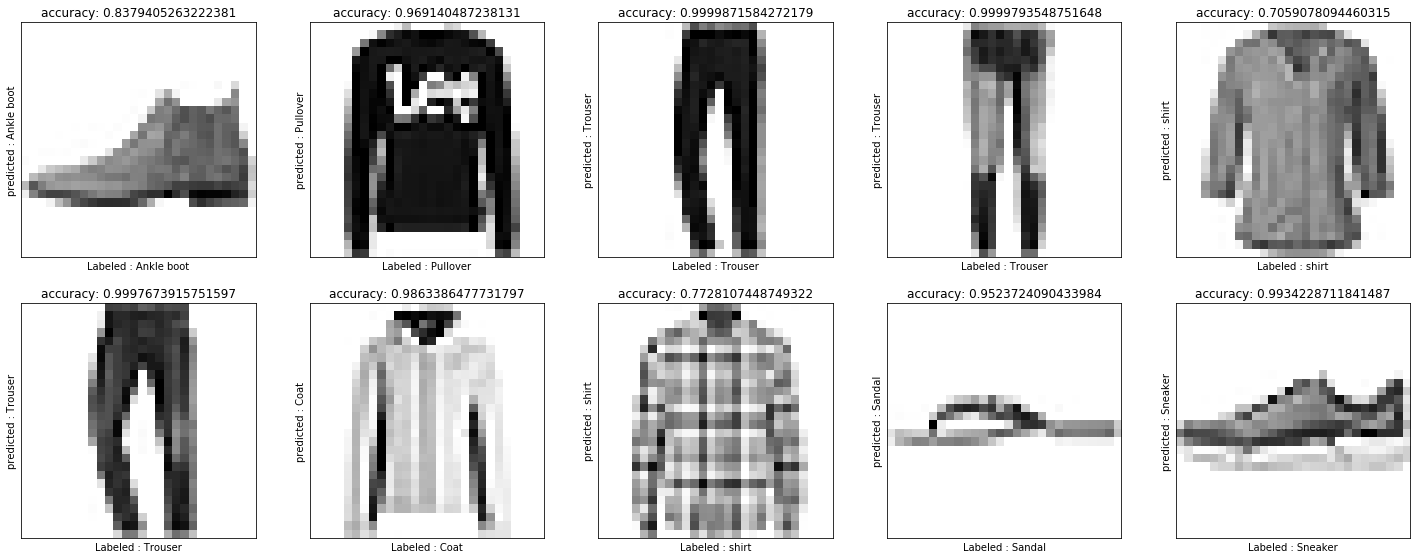

In [84]:
plt.figure(figsize=(25,25))
for i in range(10):
   
    plt.subplot(5,5,i+1) #first no denote indicate no of part into which to divide vertically
    #first argument denote indicate no of part into which to divide horizantly
    # third argument denote block no into which to plot
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow((test_images[i]).reshape((28,28)),cmap=plt.cm.binary)
   
    plt.xlabel("Labeled : "+str(class_names[test_labels[i][0]]))
    plt.ylabel("predicted : "+str(class_names[test_predict[i][0]]))
    plt.title("accuracy: "+str(test_predict_acc[i][0]))
    
   

plt.figure(figsize=(25,25))
for i in range(10):
   
    plt.subplot(5,5,2*i+1) #first no denote indicate no of part into which to divide vertically
    #first argument denote indicate no of part into which to divide horizantly
    # third argument denote block no into which to plot
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow((test_images[i]).reshape((28,28)),cmap=plt.cm.binary)
   
    plt.xlabel(class_names[test_labels[i][0]])
    plt.ylabel(class_names[test_predict[i][0]])
    plt.title("accur "+str(test_predict_acc[i][0]))
    
    plt.subplot(5,5,2*i+2) #first no denote indicate no of part into which to divide vertically
    #first argument denote indicate no of part into which to divide horizantly
    # third argument denote block no into which to plot
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.bar(test_predict_acc[i]*100,2*i+2)
   
    plt.xlabel(class_names[test_labels[i][0]])
    plt.ylabel(test_predict_acc[i][0])
    

In [85]:
print(test_predict_acc)

[[0.83794053]
 [0.96914049]
 [0.99998716]
 [0.99997935]
 [0.70590781]
 [0.99976739]
 [0.98633865]
 [0.77281074]
 [0.95237241]
 [0.99342287]]


In [86]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #importing libraray
import math
import scipy.optimize as opt


In [87]:
theta11=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\theta1.csv")
theta21=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\theta2.csv")
theta31=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\theta3.csv")
theta41=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\theta4.csv")
b11=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\b1.csv")
b21=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\b2.csv")
b31=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\b3.csv")
b41=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\train_parameter_fashion\\b4.csv")

In [88]:
theta1=np.array(theta11)[:,1:]
theta2=np.array(theta21)[:,1:]
theta3=np.array(theta31)[:,1:]
theta4=np.array(theta41)[:,1:]

b1=np.array(b11)[:,1:]
b2=np.array(b21)[:,1:]
b3=np.array(b31)[:,1:]
b4=np.array(b41)[:,1:]
print(theta1.shape,theta2.shape,theta3.shape,theta4.shape,b1.shape,b2.shape,b3.shape,b4.shape)

(256, 784) (128, 256) (64, 128) (10, 64) (256, 1) (128, 1) (64, 1) (10, 1)


In [89]:
import matplotlib.image as mp
import numpy as np
from PIL import Image

In [150]:
image_name=input("paste here your image name ")

paste here your image name pullover7.jfif


In [151]:
location=''
loc=input("paste image location in your computer")
a1="""\\"""
a1=a1[0]
#print(a1)

for i1 in range(0,len(loc)):
    if loc[i1]== a1:
        
        location=location+a1+a1
    else:
        location=location+loc[i1]
img=location+a1+a1+image_name        
print("your loaction with image name",img)        
    
    

paste image location in your computerC:\Users\PRASHANT\Desktop\coding dec19\fashion_predict
your loaction with image name C:\\Users\\PRASHANT\\Desktop\\coding dec19\\fashion_predict\\pullover7.jfif


In [152]:
import cv2

In [153]:
img7=cv2.imread(img,cv2.IMREAD_GRAYSCALE)

In [154]:
type(img7)

numpy.ndarray

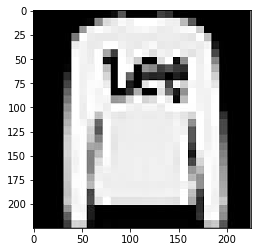

In [155]:
plt.imshow(img7, cmap="gray")
plt.show()

In [156]:
img7.shape

(225, 225)

In [157]:
img8=cv2.resize(img7,(28,28))

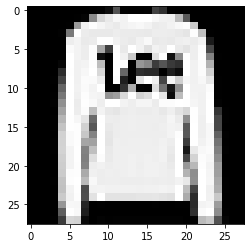

In [158]:
plt.imshow(img8, cmap="gray")
plt.show()

In [159]:
image1=np.array(img8).reshape(784,1)

In [160]:
image1=image1/255.0

In [161]:
print(np.max(image1),np.min(image1))

1.0 0.0


In [162]:
test_predict=predictions(theta1,theta2,theta3,theta4,b1,b2,b3,b4,image1)
test_predict_acc=predictions_acc(theta1,theta2,theta3,theta4,b1,b2,b3,b4,image1)  #confidence of our model on this predictions

input shape  (784, 1)
input shape  (784, 1)


In [163]:
print(test_predict)

[[2]]


In [164]:
print(" Predicted : ",class_names[test_predict[0][0]]," | Accuracy : ",test_predict_acc)

 Predicted :  Pullover  | Accuracy :  [[0.96515267]]


In [ ]:
# we find which label has highest accuracy 

In [ ]:
# here input shape is 28 X 28 and first layer flatten convert (28,28) to 784
# each node contain a score 

In [ ]:
#the model is most confident that imgae is ankle boot